<font size="+5" color="orange">**Entrega N°8**</font>

<font size="+4" color="lightgreen">**Price House DataSet**</font>

<font size="+2" color="lightgreen">
Los mercados inmobiliarios presentan una oportunidad interesante para analizar y predecir hacia dónde se dirigen los precios de las propiedades.
Para este propósito, se utiliza un conjunto de datos que contiene información sobre diferentes características de las viviendas, como el número de habitaciones (bedrooms), el tamaño del lote (sqft_lot), y más.
En este caso, se busca utilizar machine learning para entrenar y evaluar al modelo y poder predecir el precio de viviendas en base a un conjunto de datos que se puede encontrar en Kaggle, en el siguiente link: https://www.kaggle.com/datasets/shree1992/housedata.
Una vez que se ha entrenado y evaluado el modelo, se puede utilizar para realizar predicciones de precios de viviendas en datos no vistos. Esto es especialmente útil para tasadores, agentes inmobiliarios y compradores interesados en estimar el precio de una vivienda en función de sus características.
<br>
<br>
OBJETIVO: <br> <br>
El objetivo es utilizar el análisis de datos para tomar decisiones más informadas y estratégicas en la fijación de precios, lo que beneficiará tanto a los vendedores como a los compradores en el mercado inmobiliario.
<br> <br>
Contexto comercial <br> <br>
La industria inmobiliaria se encuentra en el sector de bienes raíces, que involucra la compra, venta y alquiler de propiedades residenciales y comerciales.
Podre brindarle a nuestros clientes (comprador o vendedor) un estimativo del precio de venta de la propiedad que depende de las diferentes características que tenga para que de esta manera podamos tener el precio de venta estimado sin ver la propiedad y poder brindarles una respuesta muy rápida.
<br> <br>
Problema comercial<br> <br>
Determinar el precio óptimo de una vivienda es esencial para los vendedores y compradores. Los vendedores desean maximizar sus ganancias, mientras que los compradores buscan obtener una propiedad a un precio justo. Un análisis de datos puede ayudar a encontrar el equilibrio adecuado, teniendo en cuenta las características debajo descriptas, lo que resulta en un precio competitivo y justo.
<br> <br>
Contexto analítico <br> <br>
Para poder desarrollar el modelo se cuenta con un conjunto de 4600 viviendas del Estado de Washington USA.
<br> <br>
Las variables disponibles (18) son las siguientes: <br>
date = fecha Mayo a Julio de 2014 <br>
price = precio <br>
bedrooms = dormitorios <br>
bathrooms = baños <br>
sqft_living = metraje área construida <br>
sqft_lot = metraje tamaño del terreno <br>
floors = cantidad de pisos teniendo los siguientes valores (1.0 , 1.5 , 2.0 , 2.5 , 3.0 , 3.5) <br>
waterfront = propiedad en la línea costera / siendo 1 el valor más alto y 0 el valor mínimo <br>
view = vista de la propiedad teniendo los siguientes valores (1 , 2 , 3 , 4) <br>
condition = condición de la propiedad / siendo 5 el valor más alto y 1 el valor mínimo <br>
sqft_above = metraje del ático <br>
sqft_basement = metraje del sótano <br>
yr_built = año de construcción <br>
yr_renovated = en que año fue renovada <br>
street = dirección <br>
city = ciudad <br>
statezip = código postal de la ciudad <br>
country = País (siendo el valor único USA) <br>
<br> <br>
En resumen, el objetivo final es construir un modelo preciso que pueda hacer predicciones útiles sobre el precio de las viviendas en función de sus características, lo que puede tener aplicaciones prácticas en el mercado inmobiliario y la toma de decisiones financiera.

In [ ]:
# Importo las librerías y las renombro
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
# Libreria para estimar regresión
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
# Librería para métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Levanto data
url = 'https://raw.githubusercontent.com/NicholasSprigings/DataScience_Sprigings_Entrega5ML/main/data.csv'
df = pd.read_csv(url, sep = ',')

<font size="+2" color="orange">**Variable Target: price**</font>
<br><br>
La variable objetivo es de tipo numérica, por lo que el modelo a desarrollar será de tipo Aprendizaje Supervisado: Regresión.


In [ ]:
# verifico los valores en cero en la variable target price para el df original
df[df['price']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [ ]:
df = df[df['price'] > 100]

In [ ]:
variable_target = df['price']

In [ ]:
# Metodo IQR
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

# Limites:
limite_inf = primer_cuartil - (1 * rango_intercuartilico)
limite_sup = tercer_cuartil + (1 * rango_intercuartilico)

print(limite_inf,limite_sup,rango_intercuartilico)

-4971.428570999997 988735.7142855 331235.7142855


In [ ]:
# Identifico outliers:
df['Outlier_IQR'] = np.where((df['price'] < limite_inf) | (df['price'] > limite_sup),1,0)
df['Outlier_IQR'].value_counts()

0    4198
1     353
Name: Outlier_IQR, dtype: int64

In [ ]:
# Creo mi DF sin Outliers
df_sin_outliers = df[df['Outlier_IQR']==0]

In [ ]:
# Agrego la columna de índice como una columna llamada "Index" al DataFrame
df_sin_outliers['Index'] = df_sin_outliers.index
print(df_sin_outliers.shape)

(4198, 20)


<ipython-input-51-65d11ffbf0d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['Index'] = df_sin_outliers.index


<font size="+2" color="orange">**Exploro mis datos**</font>

In [ ]:
df_sin_outliers.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier_IQR,Index
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,2
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,0,4
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,0,5


In [ ]:
print(df_sin_outliers.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'Outlier_IQR', 'Index'],
      dtype='object')


In [ ]:
print(df_sin_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4198 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4198 non-null   object 
 1   price          4198 non-null   float64
 2   bedrooms       4198 non-null   float64
 3   bathrooms      4198 non-null   float64
 4   sqft_living    4198 non-null   int64  
 5   sqft_lot       4198 non-null   int64  
 6   floors         4198 non-null   float64
 7   waterfront     4198 non-null   int64  
 8   view           4198 non-null   int64  
 9   condition      4198 non-null   int64  
 10  sqft_above     4198 non-null   int64  
 11  sqft_basement  4198 non-null   int64  
 12  yr_built       4198 non-null   int64  
 13  yr_renovated   4198 non-null   int64  
 14  street         4198 non-null   object 
 15  city           4198 non-null   object 
 16  statezip       4198 non-null   object 
 17  country        4198 non-null   object 
 18  Outlier_

In [ ]:
(df_sin_outliers.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Outlier_IQR,Index
count,4198.000000,4198.000000,4198.000000,4198.000000,4.198000e+03,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.000000,4198.0,4198.000000
mean,471901.475729,3.337542,2.071641,1994.385422,1.427446e+04,1.487851,0.003335,0.158647,3.442354,1716.158885,278.226536,1970.707242,813.356360,0.0,2269.343020
std,196120.579962,0.875187,0.696457,772.079919,3.570649e+04,0.537243,0.057659,0.613241,0.667777,728.663967,416.515118,29.440171,980.332586,0.0,1316.911052
min,7800.000000,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.0,0.000000
25%,315000.000000,3.000000,1.750000,1420.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1160.000000,0.000000,1951.000000,0.000000,0.0,1124.250000
50%,441375.000000,3.000000,2.250000,1900.000000,7.521500e+03,1.500000,0.000000,0.000000,3.000000,1520.000000,0.000000,1975.000000,0.000000,0.0,2261.500000
75%,600000.000000,4.000000,2.500000,2460.000000,1.049575e+04,2.000000,0.000000,0.000000,4.000000,2150.000000,550.000000,1996.000000,1999.000000,0.0,3397.750000
max,988500.000000,9.000000,5.750000,5960.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,5190.000000,2300.000000,2014.000000,2014.000000,0.0,4599.000000


<font size="+2" color="orange">**Estudio de Variable Target: price**</font>
<br><br>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable.

In [ ]:
variable_target = df_sin_outliers['price']
variable_target.describe()

count      4198.000000
mean     471901.475729
std      196120.579962
min        7800.000000
25%      315000.000000
50%      441375.000000
75%      600000.000000
max      988500.000000
Name: price, dtype: float64

In [ ]:
variable_target = df_sin_outliers['price']
variable_target.describe().round(0)

count      4198.0
mean     471901.0
std      196121.0
min        7800.0
25%      315000.0
50%      441375.0
75%      600000.0
max      988500.0
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribución de price')

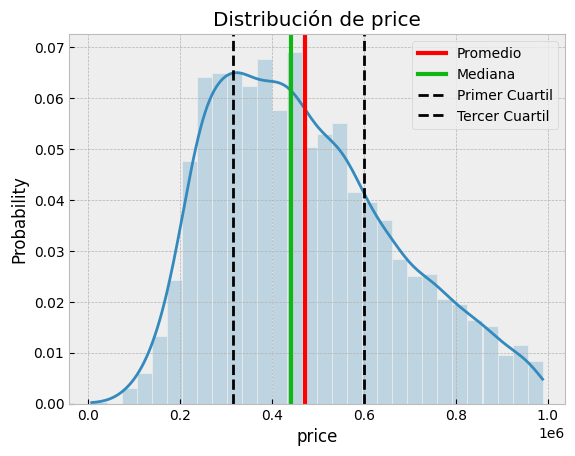

In [ ]:
# Calculo algunas medidas que voy a utilizar
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Histograma variable target: price
plt.figure()
sns.histplot(data = df_sin_outliers,
             x = 'price',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability')
plt.axvline(x = media,
            color = 'red',
            linestyle = '-',
            label = 'Promedio',
            linewidth = 3)
plt.axvline(x = mediana,
            color = '#11B613',
            linestyle = '-',
            label = 'Mediana',
            linewidth = 3)
plt.axvline(x = primer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Primer Cuartil',
            linewidth = 2)
plt.axvline(x = tercer_cuartil,
            color = 'black',
            linestyle = '--',
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()
plt.title('Distribución de price')

Interpretación: Podemos observar que la variable tiene una distribución sesgada hacia la derecha y al ser la mediana menor que el promedio confirma esta distribución con una tendencia hacia valores más altos lo que nos indica la presencia de valores atípicos en el extremo derecho lo que podría estar influyendo en esta asimetría.

Utilizare la tecnica de <font size="+2" color="orange">**Filter Feature Selection**</font> y lo que hare es calcular el Coeficiente de Correlaciín de cada una de las variables (features) con respecto a mi Variable Target: price
<br> <br/>
Este analisis es realizado para ver cuáles son las variables numéricas más relacionadas con la variable target y luego las ordenare de mayor a menor los valores hayados


In [ ]:
# Matriz de correlacion
df_sin_outliers[['price','bedrooms','bathrooms','sqft_living','sqft_lot','waterfront',
    'view','condition','yr_built']].corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,yr_built
price,1.000000,0.301862,0.455378,0.604442,0.083595,0.066158,0.193128,0.046251,0.052817
bedrooms,0.301862,1.000000,0.515591,0.603758,0.048381,-0.031756,0.061352,0.016791,0.154254
bathrooms,0.455378,0.515591,1.000000,0.713504,0.068801,0.007399,0.108109,-0.144107,0.523759
sqft_living,0.604442,0.603758,0.713504,1.000000,0.177023,0.019121,0.180998,-0.085155,0.331539
sqft_lot,0.083595,0.048381,0.068801,0.177023,1.000000,0.023222,0.085407,0.005398,0.035316
waterfront,0.066158,-0.031756,0.007399,0.019121,0.023222,1.000000,0.315218,0.029747,-0.038024
view,0.193128,0.061352,0.108109,0.180998,0.085407,0.315218,1.000000,0.040957,-0.064919
condition,0.046251,0.016791,-0.144107,-0.085155,0.005398,0.029747,0.040957,1.000000,-0.393141
yr_built,0.052817,0.154254,0.523759,0.331539,0.035316,-0.038024,-0.064919,-0.393141,1.000000


In [ ]:
# Calculo matriz de correlación
matriz_correlacion = df_sin_outliers.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion['price']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación
columnas_a_excluir = ['price', 'Outlier_IQR']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

<ipython-input-60-4a18e41e0708>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df_sin_outliers.corr(method='pearson')


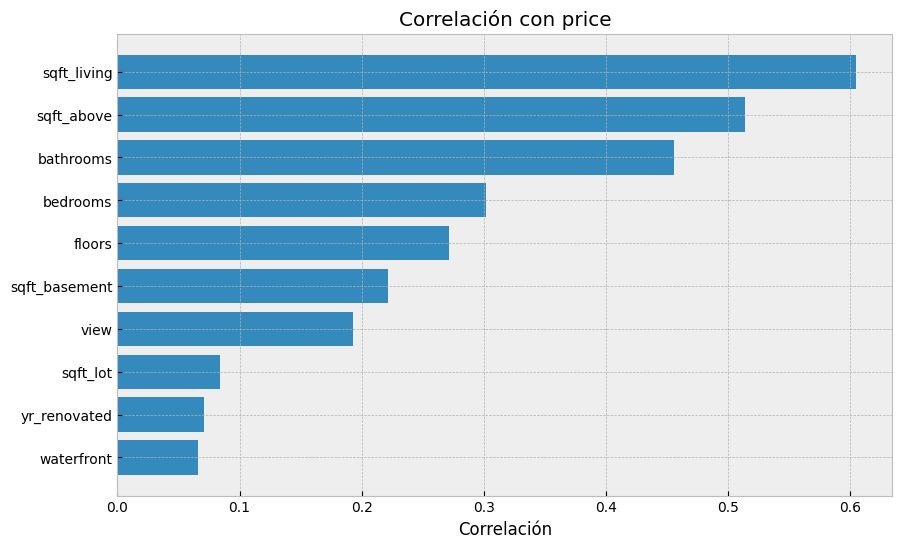

In [ ]:
# Grafico el top 10 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:10]
plt.figure(figsize=(10, 6))
plt.barh(matriz_correlacion_target_graficar.index,
         matriz_correlacion_target_graficar.values)
plt.xlabel('Correlación')
plt.title('Correlación con price')
plt.gca().invert_yaxis()
plt.show()

Inteerpretación: ordena de mayor a menor la correlación de lass variables

<font size="+2" color="orange">**Estudio univariado y bivariado de variables con más correlación**</font>

<font size="+2" color="orange">**sqft_living**</font>
<br>
Esta variable mide el área construida, es una variable NUMERICA

**sqft_living: Gráfico Univariado**

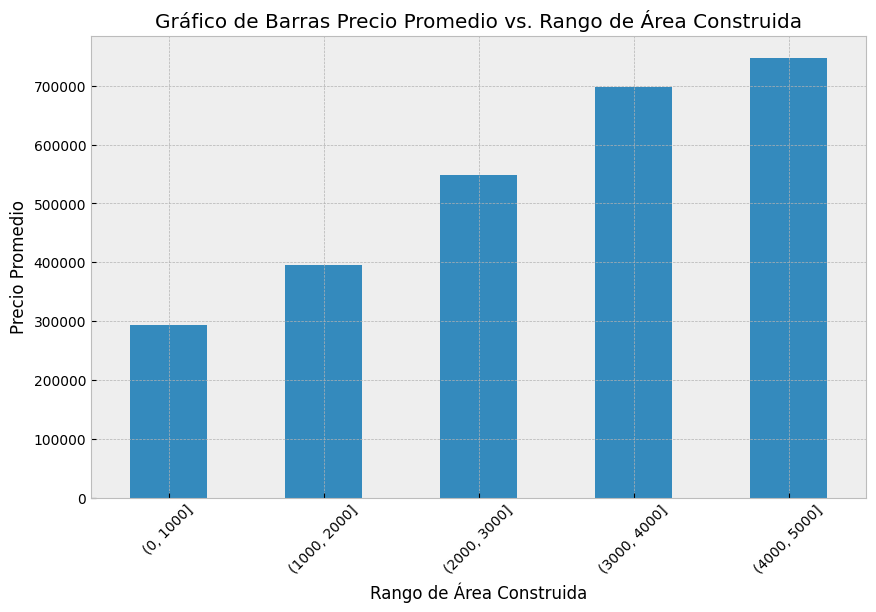

In [ ]:
intervalos = [0, 1000, 2000, 3000, 4000, 5000]
precio_promedio = df_sin_outliers.groupby(pd.cut(df_sin_outliers['sqft_living'], intervalos))['price'].mean()

plt.figure(figsize=(10, 6))
precio_promedio.plot(kind='bar')
plt.xlabel('Rango de Área Construida')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Barras Precio Promedio vs. Rango de Área Construida')
plt.xticks(rotation=45)
plt.show()

Interpretación: El precio tiende a aumentar a medida que el tamaño del área construida crece. Esto nos indica que las propiedades más grandes son más caras y que la tendencia es positiva

**sqft_living: Gráfico Bivariado**

Promedio de Área Construida: 1994.3854216293473
Moda de Área Construida: 1720
Mediana de Área Construida: 1900.0


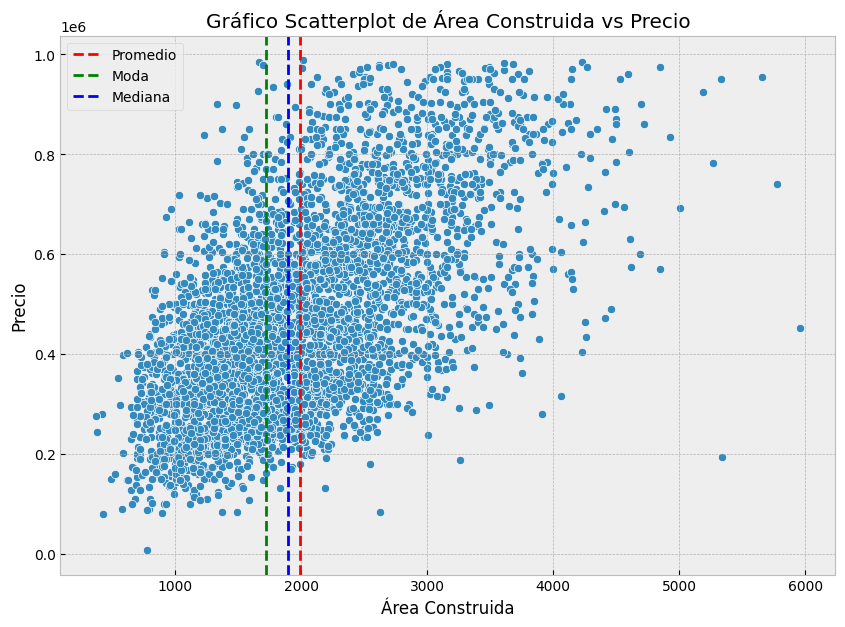

In [ ]:
# Gráfico Scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=df_sin_outliers)
plt.xlabel('Área Construida')
plt.ylabel('Precio')
plt.title('Gráfico Scatterplot de Área Construida vs Precio')

average_sqft_living = df_sin_outliers['sqft_living'].mean()
mode_sqft_living = df_sin_outliers['sqft_living'].mode()[0]
median_sqft_living = df_sin_outliers['sqft_living'].median()
print(f"Promedio de Área Construida: {average_sqft_living}")
print(f"Moda de Área Construida: {mode_sqft_living}")
print(f"Mediana de Área Construida: {median_sqft_living}")

plt.axvline(average_sqft_living, color='red', linestyle='--', label='Promedio')
plt.axvline(mode_sqft_living, color='green', linestyle='--', label='Moda')
plt.axvline(median_sqft_living, color='blue', linestyle='--', label='Mediana')
plt.legend()
plt.show()

Interpretación: El gráfico nos proporciona una representación visual de la relación entre el precio y el área construida. La moda sugiere cuál es el tamaño de área construida más común, la mediana indica el punto medio y el promedio muestra la tendencia general en términos de tamaño de área construida.

<font size="+2" color="orange">**sqft_above**</font>
<br>
Esta variable mide el metraje del ático, es una variable NUMERICA

**sqft_above: Gráfico Univariado**

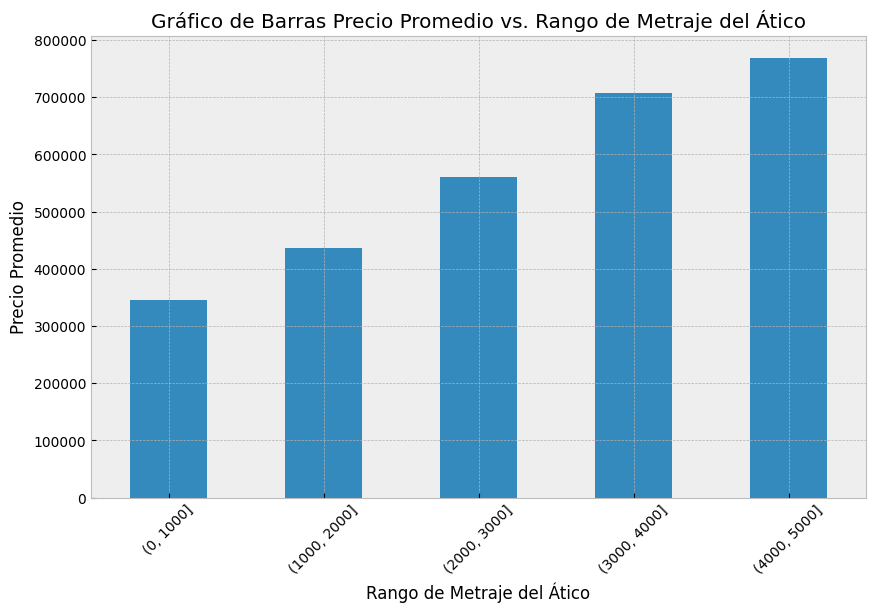

In [ ]:
intervalos = [0, 1000, 2000, 3000, 4000, 5000]
precio_promedio = df_sin_outliers.groupby(pd.cut(df_sin_outliers['sqft_above'], intervalos))['price'].mean()

plt.figure(figsize=(10, 6))
precio_promedio.plot(kind='bar')
plt.xlabel('Rango de Metraje del Ático')
plt.ylabel('Precio Promedio')
plt.title('Gráfico de Barras Precio Promedio vs. Rango de Metraje del Ático')
plt.xticks(rotation=45)
plt.show()

Interpretación: El precio tiende a aumentar a medida que el tamaño del metraje del ático crece. Esto nos indica que las propiedades más grandes son más caras y que la tendencia es positiva.

**sqft_above: Gráfico Bivariado**

Promedio de Metraje del Ático: 1716.1588851834206
Moda de Metraje del Ático: 1010
Mediana de Metraje del Ático: 1520.0


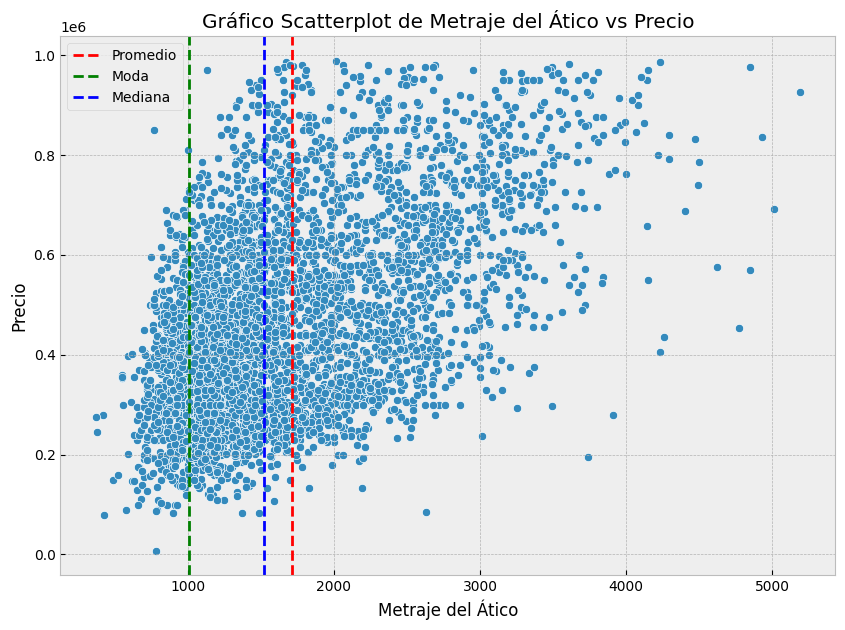

In [ ]:
# Gráfico Scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_above', y='price', data=df_sin_outliers)
plt.xlabel('Metraje del Ático')
plt.ylabel('Precio')
plt.title('Gráfico Scatterplot de Metraje del Ático vs Precio')

average_sqft_above = df_sin_outliers['sqft_above'].mean()
mode_sqft_above = df_sin_outliers['sqft_above'].mode()[0]
median_sqft_above = df_sin_outliers['sqft_above'].median()
print(f"Promedio de Metraje del Ático: {average_sqft_above}")
print(f"Moda de Metraje del Ático: {mode_sqft_above}")
print(f"Mediana de Metraje del Ático: {median_sqft_above}")

plt.axvline(average_sqft_above, color='red', linestyle='--', label='Promedio')
plt.axvline(mode_sqft_above, color='green', linestyle='--', label='Moda')
plt.axvline(median_sqft_above, color='blue', linestyle='--', label='Mediana')
plt.legend()
plt.show()

Interpretación: El gráfico nos proporciona una representación visual de la relación entre el precio y el tamaño del ático. La moda sugiere cuál es el tamaño del ático más común, la mediana indica el punto medio y el promedio muestra la tendencia general en términos de tamaño del ático.

<font size="+2" color="orange">**Estudio multivariado de variables con más correlación**</font>
<br>
¿Cómo es la correlación entre las variables seleccionadas?

In [ ]:
# Elijo el top 10 de variables más correlacionadas con el target
features_selec = matriz_correlacion_target.index[0:10]
features_selec

Index(['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors',
       'sqft_basement', 'view', 'sqft_lot', 'yr_renovated', 'waterfront'],
      dtype='object')

<Axes: >

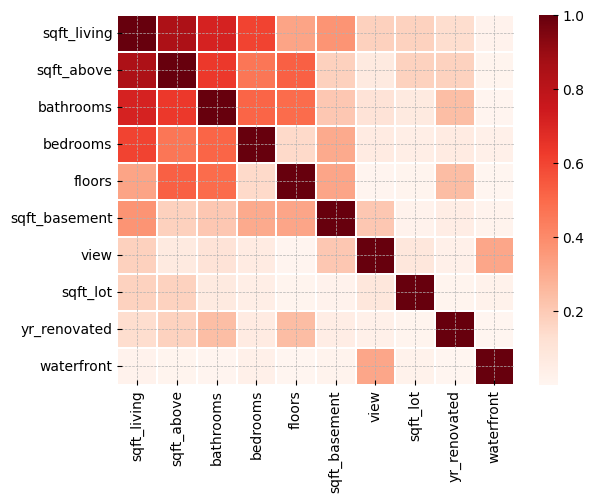

In [ ]:
matriz_correlacion = df_sin_outliers[features_selec].corr(method='pearson')
sns.heatmap(abs(matriz_correlacion),
           #cbar=False,
           linewidths = 0.3,
           cmap = 'Reds')

Interpretación: El mapa de calor proporciona una representación visual de la fuerza y dirección de estas correlaciones. Las correlaciones fuertes, ya sean positivas o negativas, pueden sugerir relaciones significativas que podrían ser útiles en análisis posteriores o modelos predictivos.

In [ ]:
# Ejemplo para ubicarlos
sqft_living_CORR = matriz_correlacion['sqft_living']
sqft_living_CORR[(abs(sqft_living_CORR)>0.6) & (mode_sqft_living_CORR != 1)]

sqft_above    0.847490
bathrooms     0.713504
bedrooms      0.603758
Name: sqft_living, dtype: float64

Esto quiere decir que cuantos más metros tengo el piso de arriba, más baños o dormitorios haya en la propiedad, mayor va a ser el metraje del área construida. Esta relaciión tiene sentido y me esta dando un indicio de que en un futuro podría haber una manera de combinar estas variables en una sola

<font size="+5" color="orange">**MODELADO**</font>

# Previo a modelar:
Chequeo Inicial
<br>


In [ ]:
# Chequeemos que sean todos números:
tipos = df_sin_outliers[features_selec].dtypes
tipos.groupby(tipos).size()

int64      7
float64    3
dtype: int64

In [ ]:
# Chequeemos vacíos:
vacios = df_sin_outliers[features_selec].isnull().sum()
vacios[vacios>0]

Series([], dtype: int64)

Divido el dataset en dos, una porción de entrenamiento y otra de testeo. Para hacer esta partición, hago una distribución de 70% del total de la muestra para entrenamiento y 30% del total de la muestra para testeo.
<br>

<font size="+2" color="orange">**TRAIN TEST**</font>


In [ ]:
# Separo usando el paquete sklearn
df_train,df_test = train_test_split(df_sin_outliers,
                                    test_size = 0.3, #Porcentaje de muestra test
                                    random_state = 42) #Semilla

Para verificar calculo los promedios y de esta manera veo que este bien realizado el split

In [ ]:
print('price Promedio en TRAIN')
print(df_train['price'].mean())
print('price Promedio en TEST')
print(df_test['price'].mean())

price Promedio en TRAIN
472468.1083356586
price Promedio en TEST
470580.23239679367


# Modelo 1:
Genero el primer modelo utilizando las top 10 variables

In [ ]:
# Ajusto el modelo
model_formula = 'price ~ ' + ' + '.join(df_train[features_selec].columns)
lm1   = sm.ols(formula = model_formula, data = df_train).fit()

In [ ]:
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))

Coeficientes:
Intercept        170260.868371
sqft_living         106.414549
sqft_above           44.026040
bathrooms          9583.140503
bedrooms         -23220.957544
floors            31439.625483
sqft_basement        62.388508
view              22250.402427
sqft_lot             -0.112979
yr_renovated          4.821637
waterfront       111087.376733
dtype: float64


In [ ]:
pvalores_1 = lm1.pvalues
print('P-Valores:')
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

P-Valores:
sqft_lot         0.154568
bathrooms        0.147173
yr_renovated     0.108772
waterfront       0.014962
floors           0.000011
view             0.000007
Intercept        0.000000
sqft_living      0.000000
sqft_above       0.000000
bedrooms         0.000000
sqft_basement    0.000000
dtype: float64


In [ ]:
# Genero columna de predicciones
df_train['Pred_1'] = lm1.predict(df_train)
df_test['Pred_1'] = lm1.predict(df_test)

In [ ]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier_IQR,Index,Pred_1
209,2014-05-06 00:00:00,483500.0,4.0,2.5,2740,45732,2.0,0,0,3,...,0,1995,0,15418 216th Ave NE,Woodinville,WA 98077,USA,0,209,571254.606398
3157,2014-06-23 00:00:00,329900.0,3.0,2.5,2242,4995,2.0,0,0,3,...,0,2011,0,Evergreen Way SE,Auburn,WA 98092,USA,0,3157,524158.570507
1263,2014-05-23 00:00:00,661254.0,4.0,4.0,2290,6250,1.5,0,0,5,...,600,1940,0,2319 41st Ave SW,Seattle,WA 98116,USA,0,1263,517689.351486
1322,2014-05-27 00:00:00,468000.0,2.0,1.0,1160,6000,1.0,0,0,4,...,300,1942,1982,3169 NE 85th St,Seattle,WA 98115,USA,0,1322,353740.155489
3354,2014-06-25 00:00:00,320000.0,4.0,2.5,2000,10051,2.0,0,0,3,...,0,1997,0,23625 SE 267th Ct,Maple Valley,WA 98038,USA,0,3354,463959.769103


In [ ]:
df_test.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Outlier_IQR,Index,Pred_1
2909,2014-06-19 00:00:00,607500.0,3.0,3.25,1530,1612,3.0,0,0,3,...,0,2006,0,1537 NW 58th St,Seattle,WA 98107,USA,0,2909,456054.059051
2193,2014-06-10 00:00:00,569000.0,5.0,3.00,3670,10583,1.0,0,0,5,...,1610,1952,1998,5011 NE 180th St,Lake Forest Park,WA 98155,USA,0,2193,704463.640762
3844,2014-07-02 00:00:00,481015.0,3.0,2.25,1550,5511,2.0,0,0,3,...,0,1987,2000,10600-10650 117th Pl NE,Kirkland,WA 98033,USA,0,3844,427242.874814
4064,2014-07-08 00:00:00,542000.0,3.0,1.75,1070,8030,1.0,0,0,3,...,0,1966,2014,13820 NE 72nd Pl,Redmond,WA 98052,USA,0,4064,318583.105197
319,2014-05-08 00:00:00,258000.0,4.0,1.75,1730,8320,1.0,0,0,3,...,500,1977,2004,30633 21st Ave SW,Federal Way,WA 98023,USA,0,319,403753.190485


# Modelo 2:
Genero segundo modelo eliminando las variables con los p-values más altos del modelo anterior donde excluyo las variables con p-values arriba de 0.1)

In [ ]:
mantener = pvalores_1.index[pvalores_1<=0.1]
mantener = mantener[mantener != 'Intercept']
mantener

Index(['sqft_living', 'sqft_above', 'bedrooms', 'floors', 'sqft_basement',
       'view', 'waterfront'],
      dtype='object')

In [ ]:
# Ajusto el modelo
model_formula = 'price ~ ' + ' + '.join(df_train[mantener].columns)
lm2   = sm.ols(formula = model_formula, data = df_train).fit()

In [ ]:
coeficientes = lm2.params
print('Coeficientes:')
print(coeficientes.head(21).round(6))

Coeficientes:
Intercept        177063.491652
sqft_living         108.609479
sqft_above           43.741663
bedrooms         -21536.432766
floors            34963.178606
sqft_basement        64.867816
view              22523.125501
waterfront       108736.830801
dtype: float64


In [ ]:
pvalores = lm2.pvalues
print('P-Valores:')
print(pvalores.head(21).round(6).sort_values(ascending=False))

P-Valores:
waterfront       0.017258
view             0.000005
Intercept        0.000000
sqft_living      0.000000
sqft_above       0.000000
bedrooms         0.000000
floors           0.000000
sqft_basement    0.000000
dtype: float64


In [ ]:
# Genero columna de predicciones
df_train['Pred_2'] = lm2.predict(df_train)
df_test['Pred_2'] = lm2.predict(df_test)

In [ ]:
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,Outlier_IQR,Index,Pred_1,Pred_2
209,2014-05-06 00:00:00,483500.0,4.0,2.5,2740,45732,2.0,0,0,3,...,1995,0,15418 216th Ave NE,Woodinville,WA 98077,USA,0,209,571254.606398,578286.248522
3157,2014-06-23 00:00:00,329900.0,3.0,2.5,2242,4995,2.0,0,0,3,...,2011,0,Evergreen Way SE,Auburn,WA 98092,USA,0,3157,524158.570507,523951.812273
1263,2014-05-23 00:00:00,661254.0,4.0,4.0,2290,6250,1.5,0,0,5,...,1940,0,2319 41st Ave SW,Seattle,WA 98116,USA,0,1263,517689.351486,504922.336398
1322,2014-05-27 00:00:00,468000.0,2.0,1.0,1160,6000,1.0,0,0,4,...,1942,1982,3169 NE 85th St,Seattle,WA 98115,USA,0,1322,353740.155489,352018.975816
3354,2014-06-25 00:00:00,320000.0,4.0,2.5,2000,10051,2.0,0,0,3,...,1997,0,23625 SE 267th Ct,Maple Valley,WA 98038,USA,0,3354,463959.769103,465546.402999


In [ ]:
df_test.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,Outlier_IQR,Index,Pred_1,Pred_2
2909,2014-06-19 00:00:00,607500.0,3.0,3.25,1530,1612,3.0,0,0,3,...,2006,0,1537 NW 58th St,Seattle,WA 98107,USA,0,2909,456054.059051,450440.977348
2193,2014-06-10 00:00:00,569000.0,5.0,3.00,3670,10583,1.0,0,0,5,...,1952,1998,5011 NE 180th St,Lake Forest Park,WA 98155,USA,0,2193,704463.640762,697486.304886
3844,2014-07-02 00:00:00,481015.0,3.0,2.25,1550,5511,2.0,0,0,3,...,1987,2000,10600-10650 117th Pl NE,Kirkland,WA 98033,USA,0,3844,427242.874814,418524.821595
4064,2014-07-08 00:00:00,542000.0,3.0,1.75,1070,8030,1.0,0,0,3,...,1966,2014,13820 NE 72nd Pl,Redmond,WA 98052,USA,0,4064,318583.105197,310433.094542
319,2014-05-08 00:00:00,258000.0,4.0,1.75,1730,8320,1.0,0,0,3,...,1977,2004,30633 21st Ave SW,Federal Way,WA 98023,USA,0,319,403753.190485,400011.492015


# Comparo los dos modelos
<br>

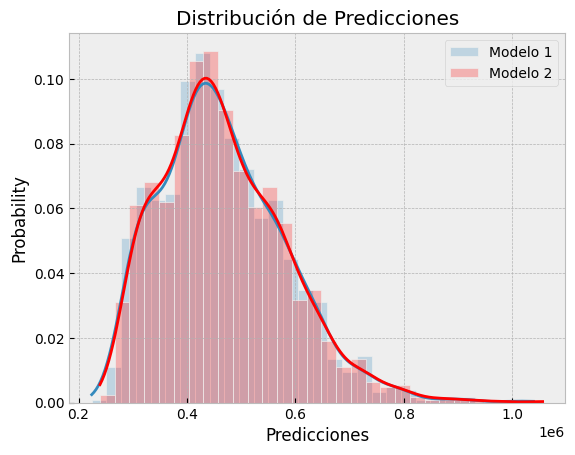

In [ ]:
# Distribución
# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df_test,
             x = 'Pred_1',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability',
            label = 'Modelo 1')
sns.histplot(data  = df_test,
             x = 'Pred_2',
             bins = 30,
             alpha = 0.25,
             kde = True,
             stat='probability',
             color='red',
             label='Modelo 2')

plt.title('Distribución de Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Probability')
plt.legend()
plt.show()

Interpretación: Los modelos parecen ser similares pero si lo comparo con el histograma original, la Distribución del las predicciones esta sesgado a la izquierda

## Métricas
Calculemos el R cuadrado y el RMSE.

In [ ]:
rmse_1_test= mean_squared_error(df_test['price'], df_test['Pred_1'], squared=False)
r_squared_1_test = r2_score(df_test['price'], df_test['Pred_1'])
rmse_1_train = mean_squared_error(df_train['price'], df_train['Pred_1'], squared=False)
r_squared_1_train = r2_score(df_train['price'], df_train['Pred_1'])

In [ ]:
rmse_2_test = mean_squared_error(df_test['price'], df_test['Pred_2'], squared=False)
r_squared_2_test = r2_score(df_test['price'], df_test['Pred_2'])
rmse_2_train = mean_squared_error(df_train['price'], df_train['Pred_2'], squared=False)
r_squared_2_train = r2_score(df_train['price'], df_train['Pred_2'])

In [ ]:
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica','Modelo','Valor'])

In [ ]:
# RMSE
nuevo_dato = {'Poblacion': 'TEST',
              'Metrica': 'RMSE',
              'Modelo': 1,
              'Valor': rmse_1_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN',
              'Metrica': 'RMSE',
              'Modelo': 1,
              'Valor': rmse_1_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TEST',
              'Metrica': 'RMSE',
              'Modelo': 2,
              'Valor': rmse_2_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN',
              'Metrica': 'RMSE',
              'Modelo': 2,
              'Valor': rmse_2_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

<ipython-input-104-0da88df4e827>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
<ipython-input-104-0da88df4e827>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
<ipython-input-104-0da88df4e827>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
<ipython-input-104-0da88df4e827>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)


In [ ]:
# R CUADRADO
nuevo_dato = {'Poblacion': 'TEST',
              'Metrica': 'R-2',
              'Modelo': 1,
              'Valor': r_squared_1_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN',
              'Metrica': 'R-2',
              'Modelo': 1,
              'Valor': r_squared_1_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TEST',
              'Metrica': 'R-2',
              'Modelo': 2,
              'Valor': r_squared_2_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {'Poblacion': 'TRAIN',
              'Metrica': 'R-2',
              'Modelo': 2,
              'Valor': r_squared_2_train}
metricas = metricas.append(nuevo_dato, ignore_index=True)

<ipython-input-105-63077dbe31e1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
<ipython-input-105-63077dbe31e1>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
<ipython-input-105-63077dbe31e1>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
<ipython-input-105-63077dbe31e1>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)


In [ ]:
metricas

,Poblacion,Metrica,Modelo,Valor
0,TEST,RMSE,1,153717.846042
1,TRAIN,RMSE,1,153288.145306
2,TEST,RMSE,2,153942.289558
3,TRAIN,RMSE,2,153452.062945
4,TEST,R-2,1,0.371318
5,TRAIN,R-2,1,0.394801
6,TEST,R-2,2,0.369481
7,TRAIN,R-2,2,0.393506


Text(0, 0.5, 'R-2')

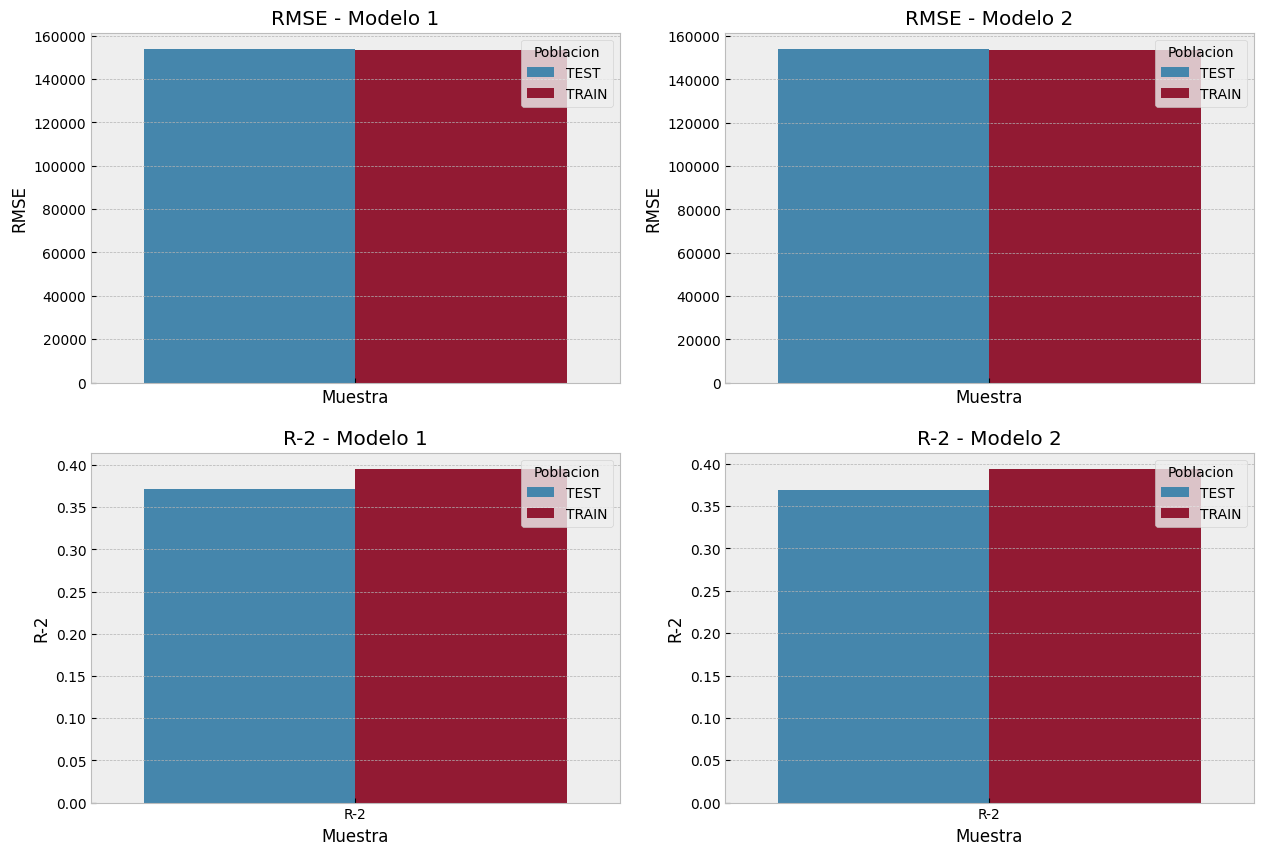

In [ ]:
fig, ax = plt.subplots(nrows = 2,
                      ncols = 2,
                      figsize = (15,10),
                      sharex = True,
                      sharey = False)

rmse_mod1 = (metricas['Metrica'] == 'RMSE') & (metricas['Modelo'] == 1)
rmse_mod2 = (metricas['Metrica'] == 'RMSE') & (metricas['Modelo'] == 2)
r_2_mod1 = (metricas['Metrica'] == 'R-2') & (metricas['Modelo'] == 1)
r_2_mod2 = (metricas['Metrica'] == 'R-2') & (metricas['Modelo'] == 2)

sns.barplot(data = metricas[rmse_mod1],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[0, 0])
ax[0, 0].set_title('RMSE - Modelo 1')
ax[0, 0].set_xlabel('Muestra')
ax[0, 0].set_ylabel('RMSE')

sns.barplot(data = metricas[rmse_mod2],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[0, 1])
ax[0, 1].set_title('RMSE - Modelo 2')
ax[0, 1].set_xlabel('Muestra')
ax[0, 1].set_ylabel('RMSE')

sns.barplot(data = metricas[r_2_mod1],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[1, 0])
ax[1, 0].set_title('R-2 - Modelo 1')
ax[1, 0].set_xlabel('Muestra')
ax[1, 0].set_ylabel('R-2')

sns.barplot(data = metricas[r_2_mod2],
            x = 'Metrica',
            y = 'Valor',
            hue = 'Poblacion',
            ax = ax[1, 1])
ax[1, 1].set_title('R-2 - Modelo 2')
ax[1, 1].set_xlabel('Muestra')
ax[1, 1].set_ylabel('R-2')

Conclusión: Las tres variables que descarte no estaban sumando ya que los modelos y las métricas son practiamente iguales.
Los valores de RMSE R-2 para ambos modelos en los conjuntos de TEST y TRAIN son bastante similares, lo cual es positivo. No parece haber una gran diferencia entre el rendimiento en ambos conjuntos, lo que sugiere que no hay signos evidentes de overfitting o underfitting.

<font size="+2" color="orange">**Modelo Selecionado: Regresión Lineal**</font>
<br>
Se selecciona este modelo ya que nuestra variable target es una variable numerica

**Modelo de Regresión lineal simple**

Text(0.5, 1.0, 'Relación entre sqft_living y price')

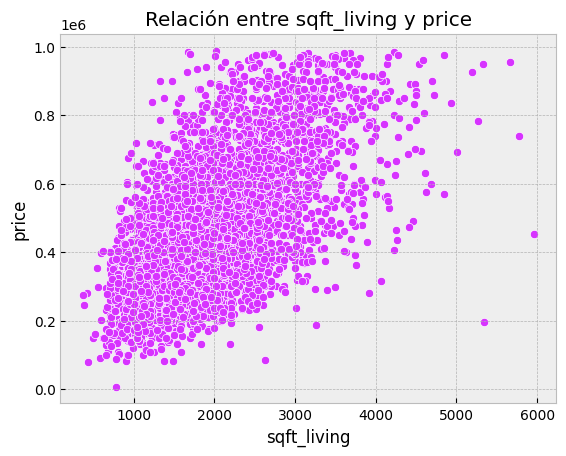

In [ ]:
plt.figure()
sns.scatterplot(data = df_sin_outliers,
                x = 'sqft_living',
                y = 'price',
               color = '#D733FF')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Relación entre sqft_living y price')

Interpretación: Se puede observar en el gráfico una cierta relación positiva entre la variable dependiente y la independiente ya que, aparentemente, a mayor sqft_living, mayor es price.

In [ ]:
# Estimo coeficientes para modelo de regresión lineal simple:
model1 = 'price ~ sqft_living'
lm1   = sm.ols(formula = model1, data = df_sin_outliers).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2416.
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:19:06   Log-Likelihood:                -56161.
No. Observations:                4198   AIC:                         1.123e+05
Df Residuals:                    4196   BIC:                         1.123e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.657e+05   6680.924     24.800      

<ipython-input-110-2032d500ab80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers['y_estimado'] = lm1.predict(df_sin_outliers)


Text(0.5, 1.0, 'Datos reales vs Estimación')

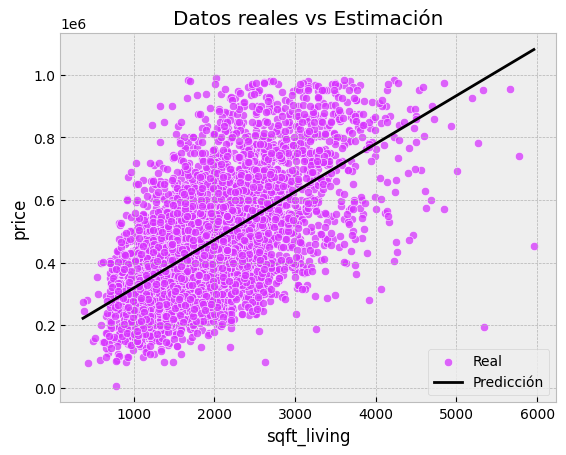

In [ ]:
df_sin_outliers['y_estimado'] = lm1.predict(df_sin_outliers)
g1 = plt.figure()
sns.scatterplot(data = df_sin_outliers,
                x = 'sqft_living',
                y = 'price',
                label = 'Real',
                color = '#D733FF',
                alpha = 0.75)
sns.lineplot(data = df_sin_outliers,
                x = 'sqft_living',
                y = 'y_estimado',
                label = 'Predicción',
                color = 'black')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Datos reales vs Estimación')

In [ ]:
coeficientes = lm1.params
print('Coeficientes:')
print(coeficientes)

Coeficientes:
Intercept      165687.841285
sqft_living       153.537842
dtype: float64


In [ ]:
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                         0              1
Intercept    152589.693306  178785.989264
sqft_living     147.413158     159.662527


In [ ]:
pvalores = lm1.pvalues
print('P-Valores:')
print(pvalores.round(6))

P-Valores:
Intercept      0.0
sqft_living    0.0
dtype: float64


In [ ]:
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

Coeficiente de determinación (R-cuadrado): 0.365


**Modelo de Regresión lineal múltiple**
<br>
Utilizare para este modelo las siguiente variables continuando el orden de la matriz de correlación:
<br>sqft_above
<br>bathrooms
<br>bedrooms

Primero realizo gráficos simples para ver la tendencia de las variables

Text(0.5, 1.0, 'Relación entre sqft_above y price')

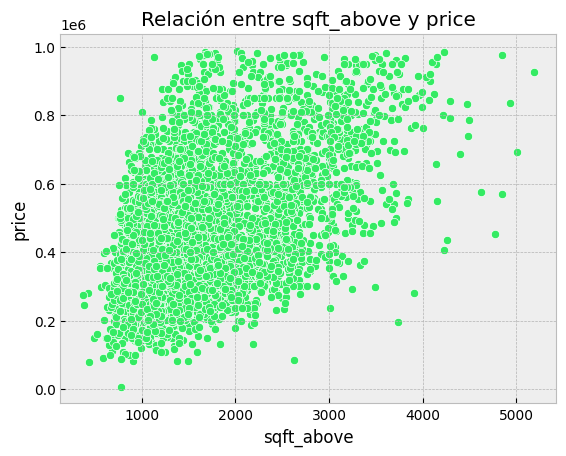

In [ ]:
plt.figure()
sns.scatterplot(data = df_sin_outliers,
                x = 'sqft_above',
                y = 'price',
               color = '#34EB63')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.title('Relación entre sqft_above y price')

Interpretación:

Text(0.5, 1.0, 'Relación entre bathrooms y price')

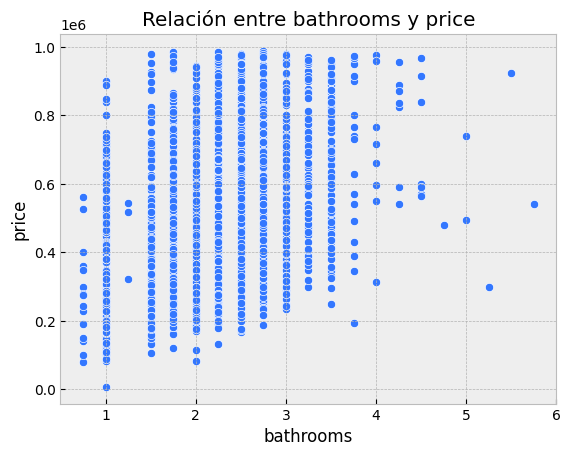

In [ ]:
plt.figure()
sns.scatterplot(data = df_sin_outliers,
                x = 'bathrooms',
                y = 'price',
               color = '#3377FF')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('Relación entre bathrooms y price')

Interpretación:

Text(0.5, 1.0, 'Relación entre bedrooms y price')

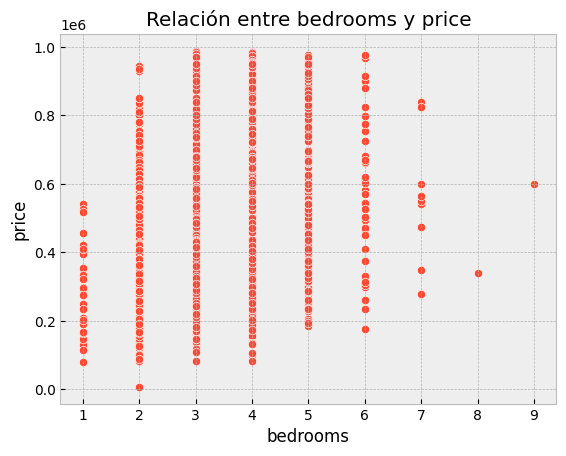

In [ ]:
plt.figure()
sns.scatterplot(data = df_sin_outliers,
                x = 'bedrooms',
                y = 'price',
               color = '#FF4933')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Relación entre bedrooms y price')

Interpretación:

In [ ]:
# Estimo coeficientes para modelo de regresión lineal múltiple:
model2 = 'price ~ sqft_living + sqft_above + bathrooms + bedrooms'
lm2   = sm.ols(formula = model2, data = df_sin_outliers).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     626.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:35:30   Log-Likelihood:                -56132.
No. Observations:                4198   AIC:                         1.123e+05
Df Residuals:                    4193   BIC:                         1.123e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.995e+05   9986.821     19.978      

In [ ]:
coeficientes = lm2.params
print('Coeficientes:')
print(coeficientes)

Coeficientes:
Intercept      199514.816813
sqft_living       161.933398
sqft_above         -5.116790
bathrooms       19497.496384
bedrooms       -24623.376129
dtype: float64


In [ ]:
intervalo_confianza = lm2.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                         0              1
Intercept    179935.355638  219094.277988
sqft_living     148.335246     175.531551
sqft_above      -17.396961       7.163382
bathrooms      9708.795113   29286.197655
bedrooms     -31489.234535  -17757.517723


In [ ]:
pvalores = lm2.pvalues
print('P-Valores:')
print(pvalores.round(6))

P-Valores:
Intercept      0.000000
sqft_living    0.000000
sqft_above     0.414034
bathrooms      0.000096
bedrooms       0.000000
dtype: float64


In [ ]:
r_cuadrado = lm2.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

Coeficiente de determinación (R-cuadrado): 0.374


Conclusión: la variable sqft_above no es buena para el modelo, por lo que la elimino